# Introduction

## Libraries

In [110]:
# for scientific computing with Python
import pandas as pd
import numpy as np
import os as os

# charting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import seaborn as sn

## Load Data

In [111]:
oecdDf = pd.read_csv('../DataAnalytics/Data/OECD_QualityOfLife.csv', sep=',')

## Clean Data

In [112]:
oecdDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        24 non-null     object 
 1   HofstederPowerDx               24 non-null     int64  
 2   HofstederIndividuality         24 non-null     int64  
 3   HofstederMasculinity           24 non-null     int64  
 4   HofstederUncertaintyAvoidance  24 non-null     int64  
 5   HofstederLongtermOrientation   24 non-null     int64  
 6   HofstederIndulgence            24 non-null     int64  
 7   Patents                        24 non-null     int64  
 8   PatentsPerCapita               24 non-null     int64  
 9   Diversity_Ethnic               24 non-null     float64
 10  Diversity_Linguistic           24 non-null     float64
 11  Diversity_Religious            24 non-null     float64
 12  ReligionMatters                22 non-null     float

### Drop Questionable Columns

In [113]:
oecdTrimmed = oecdDf.drop(oecdDf.iloc[:,26:36], axis=1, inplace=False)
#oecdTrimmed.info()#oecdTrimmed.info()

In [286]:
oecdTrimmed.drop(oecdTrimmed.columns[[14]], axis=1, inplace=True)
oecdTrimmed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, Australia to United States
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   HofstederPowerDx               22 non-null     int64  
 1   HofstederIndividuality         22 non-null     int64  
 2   HofstederMasculinity           22 non-null     int64  
 3   HofstederUncertaintyAvoidance  22 non-null     int64  
 4   HofstederLongtermOrientation   22 non-null     int64  
 5   HofstederIndulgence            22 non-null     int64  
 6   Patents                        22 non-null     int64  
 7   PatentsPerCapita               22 non-null     int64  
 8   Diversity_Ethnic               22 non-null     float64
 9   Diversity_Linguistic           22 non-null     float64
 10  Diversity_Religious            22 non-null     float64
 11  ReligionMatters                20 non-null     float64
 12  Protestantism                  22 non-

### Drop Asia

In [115]:
oecdTrimmed.set_index(oecdTrimmed.columns[0], inplace=True)

In [116]:
oecdTrimmed.drop('Korea',inplace=True)
oecdTrimmed.drop('Japan',inplace=True)


## Charting OECD Analysis

### Countries

In [117]:
oecdTrimmed.index

Index(['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland',
       'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Italy',
       'Luxembourg', 'Netherlands', 'New Zealand', 'Norway', 'Portugal',
       'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'United States'],
      dtype='object', name='Country')

In [118]:
oecdCorr = oecdTrimmed.corr()
#oecdCorr

### Filter for Significant Correlations

In [287]:
filtervalue = .5
filterDf = oecdCorr[((oecdCorr >= filtervalue) | (oecdCorr <= -filtervalue)) & (oecdCorr !=1.000)]
#filterDf


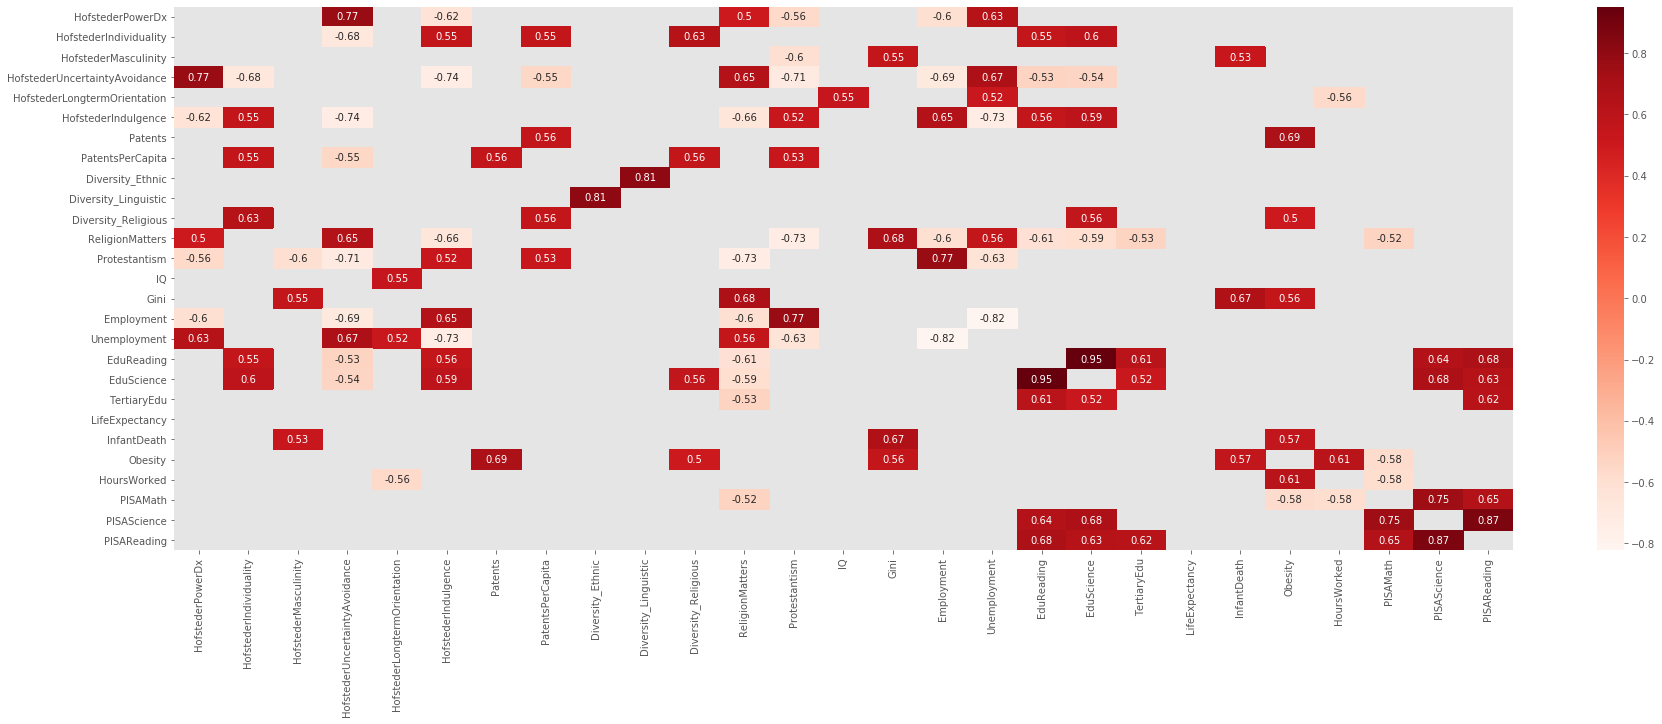

In [288]:
plt.figure(figsize=(30,10))
sn.heatmap(filterDf, annot=True, cmap="Reds")
plt.show()

## Function for Creation, Filtering, and Flattening

In [289]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

newList = corrFilter(oecdTrimmed, filtervalue)

In [290]:
newList

Unemployment          Employment                      -0.822140
HofstederIndulgence   HofstederUncertaintyAvoidance   -0.735239
ReligionMatters       Protestantism                   -0.727853
Unemployment          HofstederIndulgence             -0.725356
Protestantism         HofstederUncertaintyAvoidance   -0.705497
                                                         ...   
HofstederPowerDx      HofstederUncertaintyAvoidance    0.771210
Diversity_Linguistic  Diversity_Ethnic                 0.813236
PISAScience           PISAReading                      0.869424
EduReading            EduScience                       0.951850
HofstederPowerDx      HofstederPowerDx                      NaN
Length: 64, dtype: float64

In [291]:
def filterForLabels(df: pd.DataFrame, label) :
    try:
        sideLeft = df[label,]
    except:
        sideLeft = pd.DataFrame()

    try:
        sideRight = df[:,label]
    except:
        sideRight = pd.DataFrame()

    if sideLeft.empty and sideRight.empty:
        return pd.DataFrame()
    elif sideLeft.empty:        
        concat = sideRight.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    elif sideRight.empty:
        concat = sideLeft.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    else:
        concat = pd.concat([sideLeft,sideRight], axis=1)
        concat["Corr"] = concat[0].fillna(0) + concat[1].fillna(0)
        concat.drop(columns=[0,1], inplace=True)
        return concat

In [292]:
filterForLabels(newList, 'errortest')

""


In [293]:
filterForLabels(newList, 'HofstederMasculinity')

,Corr
Protestantism,-0.595321
InfantDeath,0.527107


In [294]:
filterForLabels(newList, 'HofstederPowerDx')

,Corr
HofstederIndulgence,-0.623498
Protestantism,-0.560072
HofstederUncertaintyAvoidance,0.771210
HofstederPowerDx,0.000000
Employment,-0.595200
ReligionMatters,0.501376
Unemployment,0.628423


In [295]:
filterForLabels(newList, 'Gini')

""


In [296]:
filterForLabels(newList, 'InfantDeath')

,Corr
HofstederMasculinity,0.527107
Obesity,0.570650


In [297]:
filterForLabels(newList, 'Obesity')

,Corr
PISAMath,-0.577810
Diversity_Religious,0.500854
HoursWorked,0.606204
InfantDeath,0.570650
Patents,0.688263


In [298]:
filterForLabels(newList, 'LifeExpectancy')

""


In [299]:
filterForLabels(newList, 'ReligionMatters')

,Corr
Protestantism,-0.727853
HofstederIndulgence,-0.657037
Employment,-0.597926
TertiaryEdu,-0.525470
HofstederPowerDx,0.501376
HofstederUncertaintyAvoidance,0.648589
EduReading,-0.612084
EduScience,-0.592280
PISAMath,-0.522468
Unemployment,0.558240


In [300]:
filterForLabels(newList, 'PatentsPerCapita')

,Corr
HofstederUncertaintyAvoidance,-0.546334
Patents,0.557863
Diversity_Religious,0.561090
Protestantism,0.531227
HofstederIndividuality,0.554806


In [301]:
filterForLabels(newList, 'TertiaryEdu')

,Corr
EduReading,0.613426
PISAReading,0.621375
ReligionMatters,-0.525470
EduScience,0.519115


In [302]:
filterForLabels(newList, 'PISAMath')

,Corr
HoursWorked,-0.580888
ReligionMatters,-0.522468
PISAReading,0.647065
PISAScience,0.749220
Obesity,-0.577810


In [303]:
filterForLabels(newList, 'PISAReading')

,Corr
TertiaryEdu,0.621375
EduScience,0.629846
PISAMath,0.647065
EduReading,0.684712
PISAScience,0.869424


In [304]:
filterForLabels(newList, 'PISAScience')

,Corr
EduScience,0.680741
PISAReading,0.869424
EduReading,0.643781
PISAMath,0.749220


In [305]:
filterForLabels(newList, 'Employment')

,Corr
HofstederPowerDx,-0.595200
HofstederIndulgence,0.650006
Protestantism,0.765555
Unemployment,-0.822140
HofstederUncertaintyAvoidance,-0.692188
ReligionMatters,-0.597926


In [306]:
filterForLabels(newList, 'Unemployment')

,Corr
Employment,-0.822140
HofstederIndulgence,-0.725356
Protestantism,-0.633935
HofstederLongtermOrientation,0.519325
ReligionMatters,0.558240
HofstederPowerDx,0.628423
HofstederUncertaintyAvoidance,0.674791


In [307]:
filterForLabels(newList, 'HoursWorked')

,Corr
PISAMath,-0.580888
HofstederLongtermOrientation,-0.562984
Obesity,0.606204
